
# 第六讲上机
1.随机数据集比较
(1)随机生成 $[0,1]$ 区间均匀分布的 $1000$ 个数, 构成样本一
(2)随机生成 $[0,1.1]$ 区间均匀分布的 $1000$ 个数, 构成样本二
(3)在同一张图上画出以上两个样本的分布(`boxplot`)
(4)对以上两样本是否来自同一分布做统计检验


	Two-sample Kolmogorov-Smirnov test

data:  sample1 and sample2
D = 0.08, p-value = 0.003323
alternative hypothesis: two-sided


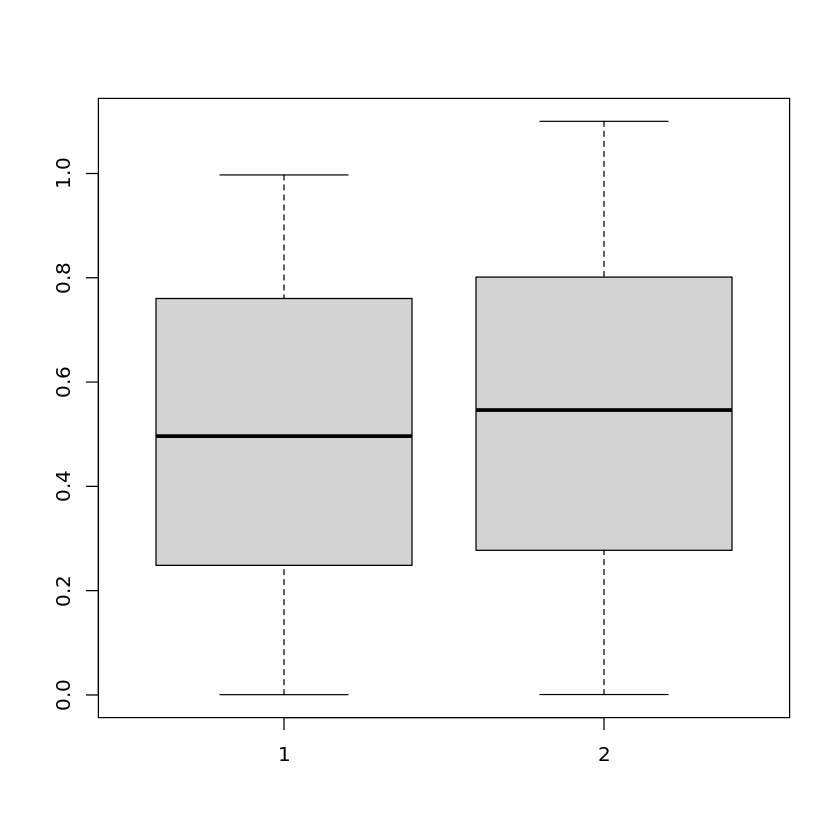

In [9]:
sample1 <- runif(1000)
sample2 <- runif(1000, min = 0, max = 1.1)
boxplot(list(sample1, sample2))
ks.test(sample1, sample2)
# 不同分布

2.为研究分娩过程中使用胎儿电子监测仪对剖腹产率有无影响, 对 $5824$ 例分娩的产妇进行回顾性调查, 试进行统计检验

|剖腹产|使用|未使用|合计|
|:-----:|:---:|:-----:|:---:|
|是|358|229|587|
|否|2492|2745|5237|
|总计|2850|2974|5824|

In [7]:
x <- c(358, 2492, 229, 2745)
dim(x) <- c(2, 2)
chisq.test(x)


	Pearson's Chi-squared test with Yates' continuity correction

data:  x
X-squared = 37.414, df = 1, p-value = 9.552e-10


3.用 `read.table` 读入 `hg19_gene_table.txt`
(1)用 `chisq.test` 检验基因的 `strand` 分布是否随机 ($\pm$ `strand` 各占一半)
(2)对基因长度 `glen`
(a)用 `shapiro.test` 检验 `glen` 是否符合正态分布
(b)运行如下命令

```R
lgl <- log(glen)
lgl[lgl < 6] <- NA
```

(c) 仿照课件中下图画出 `lgl` 的直方图, 密度图和正态分布的密度图


	Chi-squared test for given probabilities

data:  table(data$strand)
X-squared = 43.579, df = 1, p-value = 4.073e-11



	Shapiro-Wilk normality test

data:  glen[1:5000]
W = 0.41455, p-value < 2.2e-16


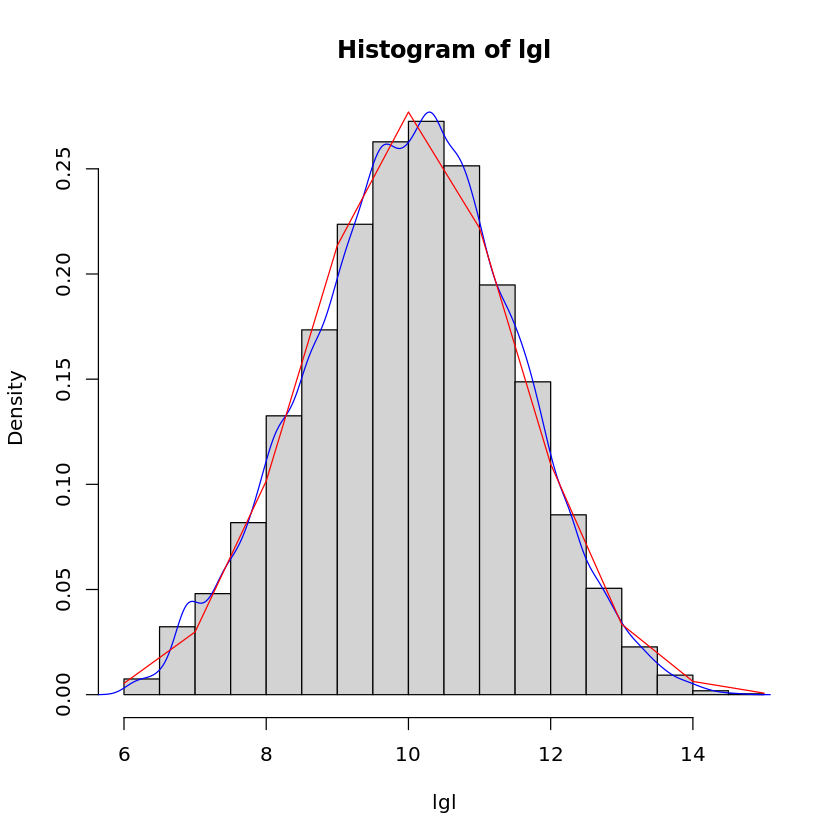

In [37]:
# (1) strand 是否随机
data <- read.table('/home/ubuntu/R_course/hg19_gene_table.txt', header = T)
chisq.test(table(data$strand), p = c(1, 1) / 2)

# (2)
# (a)
glen <- data$txEnd - data$txStart + 1
shapiro.test(glen[1:5000])
# (b)
lgl <- log(glen)
lgl[lgl < 6] <- NA
# (c)
hist(lgl, freq = F)
lines(density(lgl, na.rm = T), col = 'blue')
x <- 6:15
lines(x, dnorm(x, mean(na.omit(lgl)), sd(na.omit(lgl))), col = 'red')